Regression – Homework
===========

In [117]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [19]:
import os
os.chdir(r"C:\Users\Илья\Desktop\data")
path = r"C:\Users\Илья\Desktop\data\AirQualityUCI.xlsx"

### 1. Предобработка данных
### 2. EDA
### 3. Linear regression
### 4. Feature importance, residual analysis
### 5. VIF
### 6. Time series analysis

### Предобработка данных

In [134]:
df = pd.read_excel(path)

In [135]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [136]:
df.shape

(9357, 15)

Из интересного:
1. у нас есть столбы с датой и временем.Причем измерения проводится с фиксированной периодичностью (1 раз в час). Значит можем построить временной ряд и поиграться с трендами уровнями и прочим.)
2. Понятное дело что нам надо анализировать содержание 


Итого у нас 15 столбцов, надо посмотреть содержатся ли пропущенные значения в наших столбцах

In [28]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [24]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


У нас нет пропущенных значений,но учитывая то, что у нас в данных присутствует значение "-200" его можно принять как пропуск.
Заменим это значение на Nan.

In [137]:
df.replace(to_replace = -200, value = np.nan, inplace=True)
null_values = df.isnull().sum()
null_values

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Посмотрим кол-во пропущенных значений в нашем датасете по каждой колонке.

Text(0.5,1,'пропущенные значения')

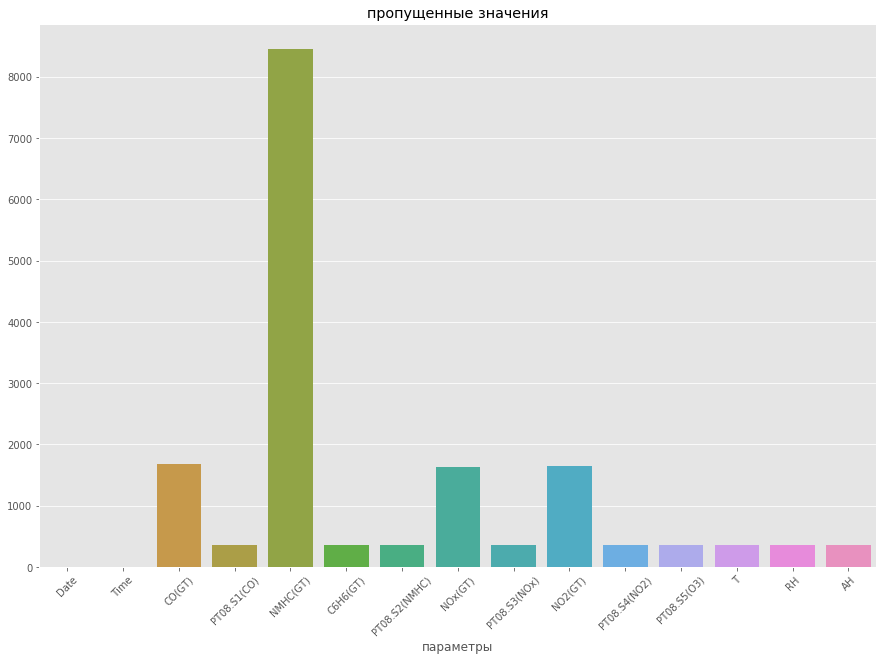

In [32]:
plt.figure(figsize=(15,10))
sb.barplot(x = df.columns, y = list(map(lambda x : df[x].isnull().sum(),df.columns) ))
plt.xticks(rotation = 45)
plt.xlabel("параметры")
plt.title("пропущенные значения")

Как видим у нас в колонке '''NMHC(GT)''' около 8000 пропущенных значений.Ее проще убрать, чем пытаться как то починить.
Плюс из горького личного опыта, известно как пандас не любит дату и время,поэтому надо привести их к читаемому формату.

In [138]:
df.drop(['NMHC(GT)'],axis=1,inplace = True)
df['DateTime'] = df['Date'].astype('str')+' '+df['Time'].astype('str')
df['DateTime'] = pd.to_datetime(df['DateTime'].astype('str'),format = "%Y/%m/%d %H:%M:%S")
year = list(map(lambda x : x.year,df['DateTime']))
df['year'] = pd.DataFrame(year)
df['YearMonth'] = df.DateTime.dt.to_period('m')

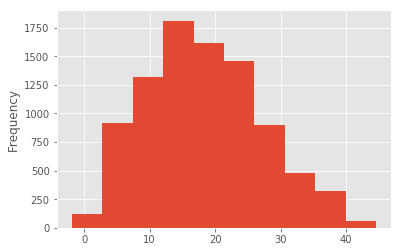

In [44]:
df['T'].plot.hist()


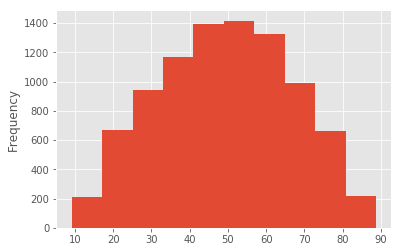

In [43]:
df['RH'].plot.hist()

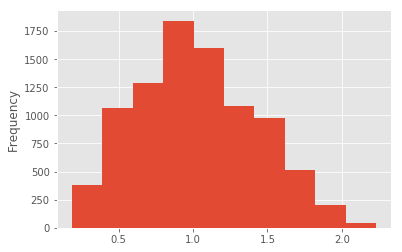

In [42]:
df['AH'].plot.hist()

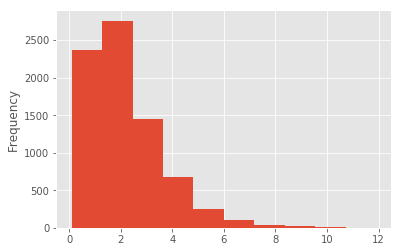

In [41]:
df['CO(GT)'].plot.hist()

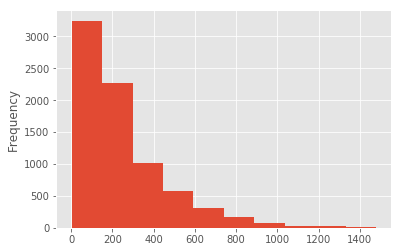

In [45]:
df['NOx(GT)'].plot.hist()

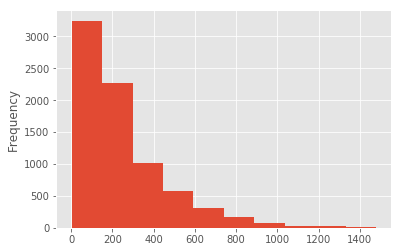

In [46]:
df['NOx(GT)'].plot.hist()

Распределение похоже на нормальное или логнормальное, поэтому заменим пропущенные значения средними.

In [139]:
df['T'] = df.groupby(['Date'])['T'].apply(lambda x : x.fillna(x.mean()))
df['RH'] = df.groupby(['Date'])['RH'].apply(lambda x : x.fillna(x.mean()))
df['AH'] = df.groupby(['Date'])['AH'].apply(lambda x : x.fillna(x.mean()))
df['CO(GT)'] = df.groupby(['Date'])['CO(GT)'].apply(lambda x : x.fillna(x.mean()))
df['NOx(GT)'] = df.groupby(['Date'])['NOx(GT)'].apply(lambda x : x.fillna(x.mean()))
df['NO2(GT)'] = df.groupby(['Date'])['NO2(GT)'].apply(lambda x : x.fillna(x.mean()))

In [50]:
df.isna().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
DateTime         False
year             False
YearMonth        False
dtype: bool

In [140]:
df.fillna(method='ffill',inplace=True)
df.isna().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
DateTime         False
year             False
YearMonth        False
dtype: bool

In [141]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.604396,10.190299,942.422741,239.406473,832.618539,109.369051,1452.890358,1030.388426,18.165706,49.286349,1.018346,2004.240141
std,1.383347,219.599578,7.565011,269.583076,200.825951,255.704654,46.047394,347.427351,410.906048,8.834563,17.199988,0.403606,0.427192
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,2004.000000
25%,1.100000,938.250000,4.401596,732.500000,102.000000,654.500000,76.000000,1227.750000,726.000000,11.475000,36.129412,0.727607,2004.000000
50%,1.700000,1061.500000,8.276765,910.500000,176.521739,806.750000,103.600000,1459.750000,963.750000,17.575000,49.550000,0.988105,2004.000000
75%,2.700000,1237.250000,14.019301,1117.250000,316.000000,967.500000,135.000000,1676.750000,1286.500000,24.350000,62.549999,1.309925,2004.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,2005.000000


### 2. EDA

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


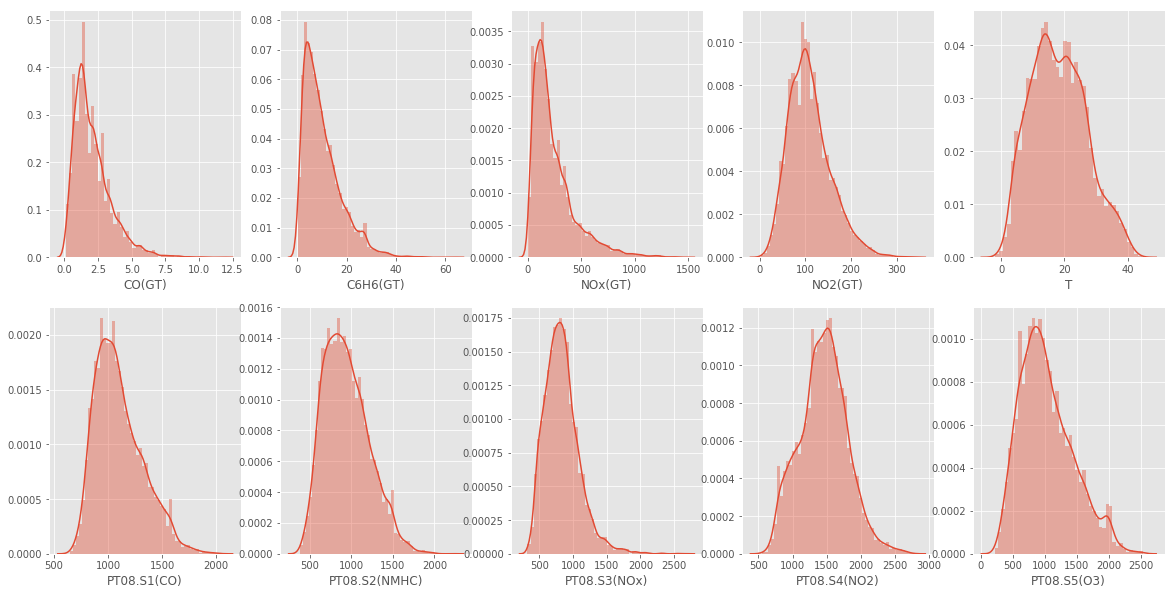

In [56]:
fig ,axes = plt.subplots(2,5,figsize = (20,10)) 
sb.distplot(df['CO(GT)'],ax=axes[0][0])
sb.distplot(df['PT08.S1(CO)'],ax=axes[1][0])
sb.distplot(df['PT08.S2(NMHC)'],ax=axes[1][1])
sb.distplot(df['C6H6(GT)'],ax=axes[0][1])
sb.distplot(df['NOx(GT)'],ax = axes[0][2])
sb.distplot(df['NO2(GT)'],ax = axes[0][3])
sb.distplot(df['PT08.S3(NOx)'],ax = axes[1][2])
sb.distplot(df['PT08.S4(NO2)'],ax = axes[1][3])
sb.distplot(df['PT08.S5(O3)'],ax = axes[1][4])
sb.distplot(df['T'],ax = axes[0][4])

fig.show()

Seems normal) 

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Колебания C6H6 в течении года по месяцам')

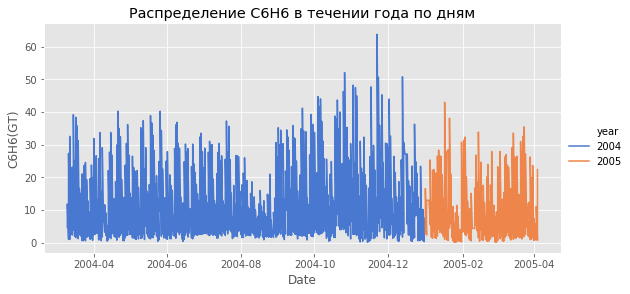

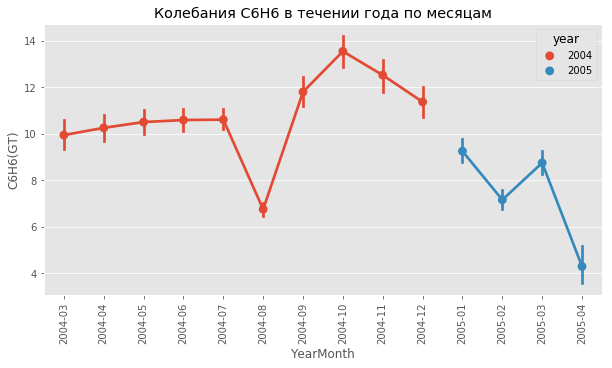

In [67]:
sb.relplot(x = "Date",y="C6H6(GT)",kind="line",estimator = None,hue = "year",palette=sb.color_palette("muted",n_colors = 2),data = df,height = 4,aspect = 2)
plt.title('Распределение C6H6 в течении года по дням')

plt.figure(figsize=(10,5))
sb.pointplot(x = "YearMonth", y= "C6H6(GT)", kind = "line",hue = "year",data = df)
plt.xticks(rotation =90)
plt.title("Колебания C6H6 в течении года по месяцам")


С6H6 он же бензол.Бензол высокотоксичен, это сильный канцероген, длительное воздействие даже небольшими дозами может служить причиной лейкемии. Быстро испаряется при температуре от +5 °С, в газообразном виде легко возгорается, взрывается, поэтому концентрацию бензола необходимо вычислять в целях контроля атмосферного воздуха. 
Выше представлены графики распределения бензола по дня в течении года (рисунок 1)
и среднее значение по месяцам в течении года (рисунок 2).
Видим, что у нас есть сезонное колебания в августе, и затем резкий подъем в осенние месяца. Могу предположить такую связь: поскольку бензол продукт распада в результате работы пром предприятий, а июль-август традиционно являются месяцами отпусков, то в связи с этим происходит падение производства и мощностей на предприятиях и соотвественно снижается выброс бензола в окр среду.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


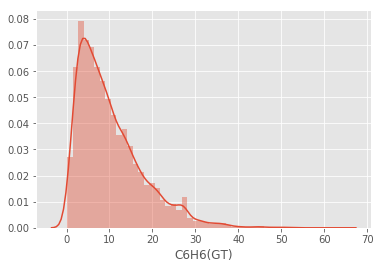

In [70]:
sb.distplot(df['C6H6(GT)'],kde = True)

Логнормальное распределение, все ок работаем дальше

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


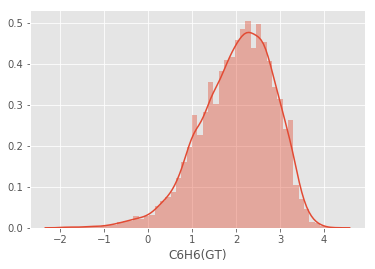

In [456]:
sb.distplot(np.log(df['C6H6(GT)']),kde = True)

Хоба!

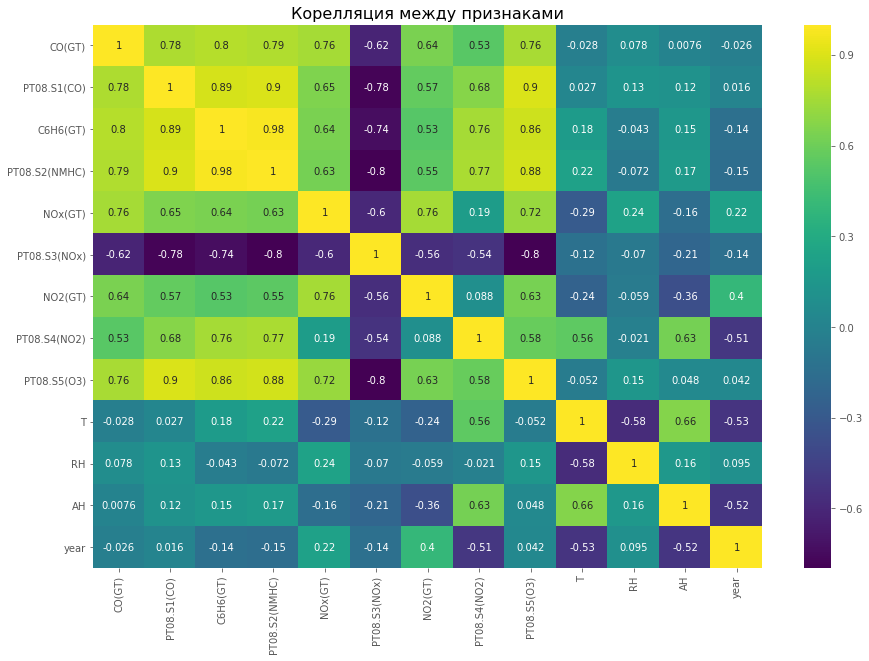

In [71]:
#Heat map of variables
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Корелляция между признаками',fontsize=16)
plt.xticks(rotation = 90)
plt.show()

Мультиколлинеарность можно проверить с помощью ковариационной матрицы. При вычислении матрицы двумерной корреляции Пирсона между всеми независимыми переменными величина коэффициентов корреляции должна быть меньше 0,5.Приведенная выше ковариационная тепловая карта показывает, что существует ковариация между некоторыми независимыми переменными. Поскольку данные являются временными рядами, нормально, что между независимыми переменными будет высокая ковариация.
Что можно отметить:
1. У нас довольная сильная линейная зависимость между всеми химическими соеденениями и нашей целевой переменной. Это можно интерпретировать следующим образом-поскольку загрязнение воздуха происходит в результате выбросов в окружающую среду, то почти всегда это смесь газов, в которой присутсвуют все вышеперечисленные элементы включая бензол.Поэтому для избежания мультиколлинеарности предлагаю исключить данные признаки из рассмотрения при построении нашей модели.
2. Оставляем в итоге температуру, относительную и абсолютную влажности (Т,RH,AH). Вполне логично, ведь именно внешние условия влияют на протекание химических реакции с участием бензола. Можно предположить что изменения в этих параметрах влияют на концентрацию бензола в окружающем воздухе.

### 3. Linear regression

Линейная регрессия требует, чтобы отношения между независимыми и зависимыми переменными были линейными.  Также важно учитывать наличие выброcов, так как линейная регрессия чувствительна к выбросам.  

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


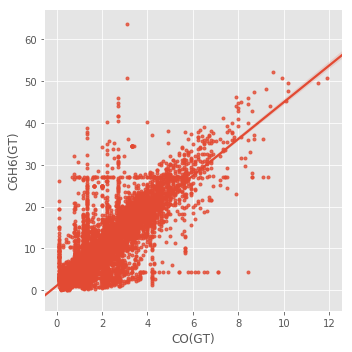

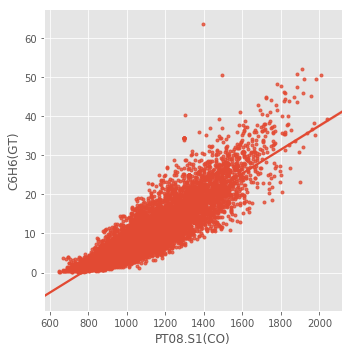

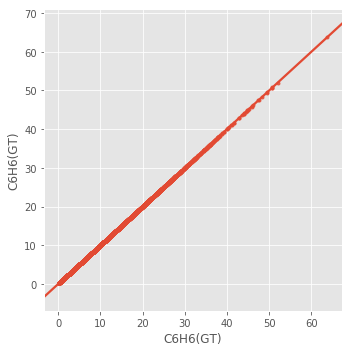

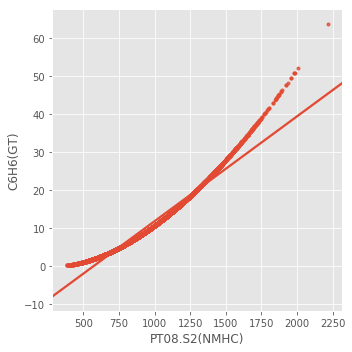

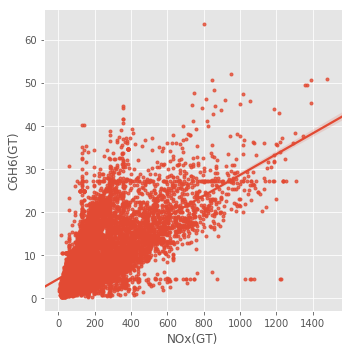

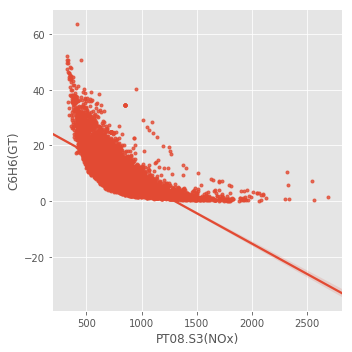

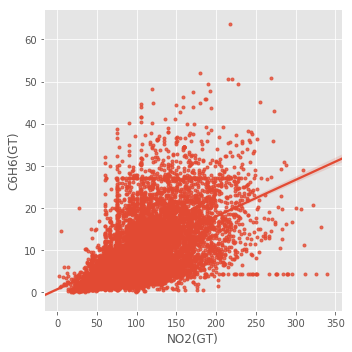

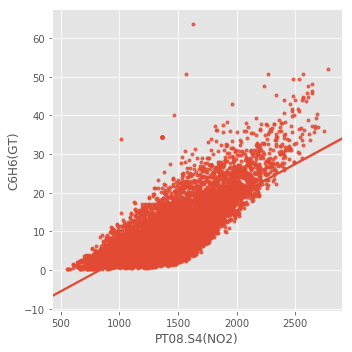

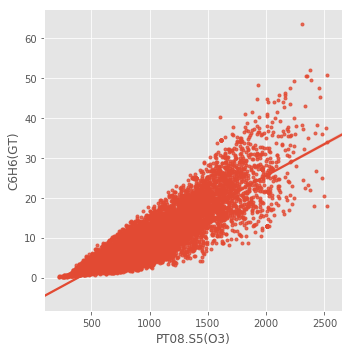

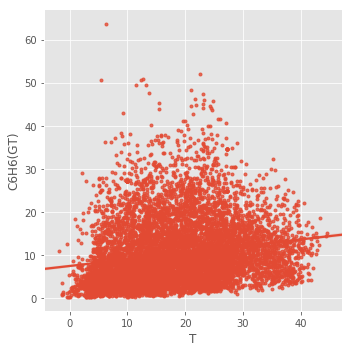

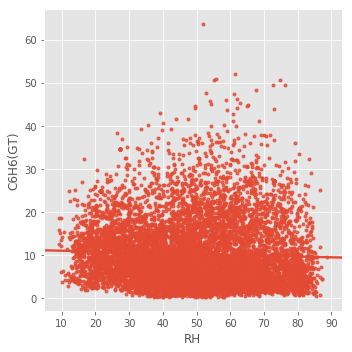

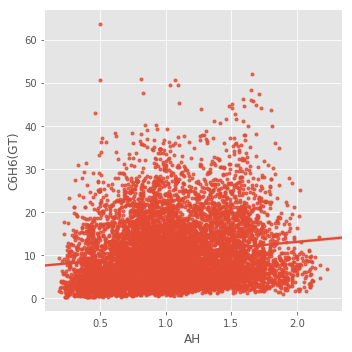

In [72]:
col_= df.columns[2:-3]
for i in col_:
    sb.lmplot(x=i,y='C6H6(GT)',data=df,markers='.')

Не все мне нравиться на наших графиках с точки зрения линейности. Например PT08.S3 и PT08.S2 и там и там уместнее было бы использовать степенную или полиномиальную звависимости. Ну попробую бахнуть в лоб для начала

In [327]:
def linear_regressor(x_train_s, y_train_s):
    y2 = sm.add_constant(x_train_s)
    dst = sm.OLS(y_train_s,y2)
    dst2 = dst.fit()
    return dst2

In [328]:
y = np.log(df['C6H6(GT)'])
data = df.drop(['C6H6(GT)'],axis=1)
x = data.iloc[:,2:-3]

In [329]:
ss = StandardScaler()
x_std = ss.fit_transform(x)

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [331]:

dst2 = linear_regressor(x_train,y_train)
cols = x_train.columns
print(dst2.summary())

pcols = []
for num,pvalue in enumerate(dst2.pvalues):
    if pvalue >= 0.05:
        pcols.append(cols[num-1])
 
print(pcols)
x_train.drop(pcols,axis = 1,inplace = True)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:50:30   Log-Likelihood:                 1347.1
No. Observations:                6549   AIC:                            -2670.
Df Residuals:                    6537   BIC:                            -2589.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2179      0.046      4.750

D:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Feature importance, residual analysis

У нас есть два параметра 'PT08.S4(NO2)', 'PT08.S5(O3)' чье значение p-value превышает 0,05.Следовательно значения коэфициентов при этих величинах не являются значимыми для нашей модели регрессии и их можно исключить .

In [332]:
y = np.log(df['C6H6(GT)'])
data = df.drop(['C6H6(GT)','PT08.S4(NO2)', 'PT08.S5(O3)'],axis=1)
x = data.iloc[:,2:-3]

In [333]:
ss = StandardScaler()
x_std = ss.fit_transform(x)

In [334]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [335]:

dst2 = linear_regressor(x_train,y_train)
cols = x_train.columns
print(dst2.summary())

pcols = []
for num,pvalue in enumerate(dst2.pvalues):
    if pvalue >= 0.05:
        pcols.append(cols[num-1])
 
print(pcols)
x_train.drop(pcols,axis = 1,inplace = True)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:50:54   Log-Likelihood:                 1344.5
No. Observations:                6549   AIC:                            -2669.
Df Residuals:                    6539   BIC:                            -2601.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1852      0.042      4.421

D:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Итак мы исключили два параметра. Продолжим упрощать нашу модель, руководствуясь следующими принципами:
1. Значение const должно быть >0, т.к. мы не должны нарушать физический смысл нашей модели.(В воздухе не может быть отрицательное число бензола)
2. Будем убирать  признаки с наименьшими коэффицантами, а так же коррелирующие между собой. Все для того чтобы уменьшить мультиколлинеарность
3. Уберем значение абсолютной влажности AH, т.к оно не информативно для нашей задачи, и не имеет для нас ценности при наличии относительной влажности

['PT08.S4(NO2)', 'PT08.S5(O3)','PT08.S1(CO)','AH']-отметаем эти 4 признака

In [442]:
y = np.log(df['C6H6(GT)'])
data = df.drop(['C6H6(GT)','PT08.S4(NO2)', 'PT08.S5(O3)','PT08.S1(CO)','AH'], axis=1)
x = data.iloc[:,2:-3]

In [443]:
ss = StandardScaler()
x_std = ss.fit_transform(x)

In [444]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [445]:

dst2 = linear_regressor(x_train,y_train)
cols = x_train.columns
print(dst2.summary())

pcols = []
for num,pvalue in enumerate(dst2.pvalues):
    if pvalue >= 0.05:
        pcols.append(cols[num-1])
 
print(pcols)
x_train.drop(pcols,axis = 1,inplace = True)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:54:23   Log-Likelihood:                 1208.1
No. Observations:                6549   AIC:                            -2400.
Df Residuals:                    6541   BIC:                            -2346.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0960      0.040      2.409

D:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Получаем R^2=0,942. Можно и дальше выбрасывать признаки и продолжать сокращать уравнение для нашей модели,НО...
я решил остановиться на этом этапе и вот почему:
1. коэф при нашем свободном члене >0 , то есть с точки зрения физики мы не нарушаем правила термодинамики
2. коэфы при температуре и влажности >0 что тоже согласуется с физикой процесса.
3. коэф при CO(GT) <0 и это тоже согласуется с физической составляющей. Уменьшении значения СО в сенсоре может свидетельствовать о начале процесса распада газа на хим составляющие и соотвественно увеличению концентрации бензола в воздухе
4. Остальные коэф настолько незначительны что их вклад в итогое значение не сущетсвенен

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Остатки')

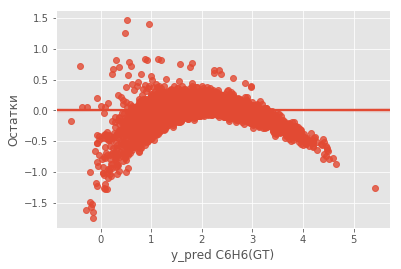

In [450]:
x3 = sm.add_constant(x_train)
y_train_pred1 = dst2.predict(x3)
resid1 = (y_train - y_train_pred1)
sb.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred C6H6(GT)")
plt.ylabel("Остатки")


Конечно линейной зависимостью это не назвать, но опять же есть мнение что скорее всего дело в выбросах.

Построим графикй квантиль-квантиль (QQ plot).Точки нормального графика КК дают представление об одномерной нормальности набора данных. Если данные распределены нормально, точки выстроятся на базовой линии, проходящей под углом 45 градусов. Если данные не распределены нормально, точки отклоняться от базовой линии.


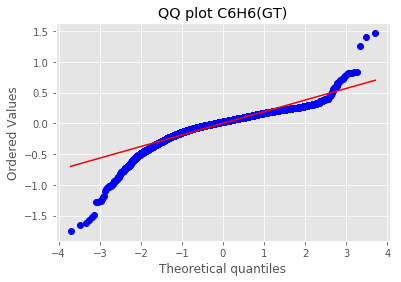

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [451]:
import pylab
stats.probplot(resid1, dist="norm", plot=pylab)
pylab.title("QQ plot C6H6(GT)")
pylab.show()
pylab.figure()

Из графика видно что точки очень плотно "ложатся" на нашу прямую в пределах от -3 до 3 квантиля. Можно предположить что наше распределение можно отнести к нормальным,с наличием выбросов (значения в 4 и -4 квантилях).

### Проверка на мультиколлинеарность с помощью VIF-анализа

In [448]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [449]:
vif 

[12.026236845009928,
 41.88630985230625,
 9.986190100790326,
 9.959249573509279,
 15.711720521868354,
 9.8326476188324,
 11.048960595844154]

<StemContainer object of 3 artists>

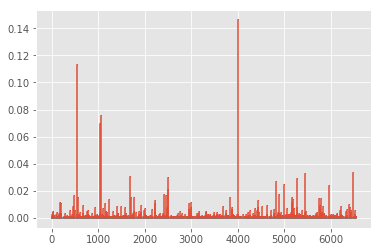

In [452]:
influence = dst2.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

Так значение <1 то можно сделать вывод что в наших данных нет "критических" значений

Поскольку мы имеем дело с временными рядом, неплохо было провести тест Дики-Фуллера на стационарность ряда,а так же попробывать алгоритмы сглаживаний (средневзвешенное по ряду и.т.д.) для прогноза наших значений в ряду.

### Time series analysis

In [188]:
x_train_tran = x_train.copy()
y_train_tran = y_train.copy()

Results of Dickey-Fuller Test:


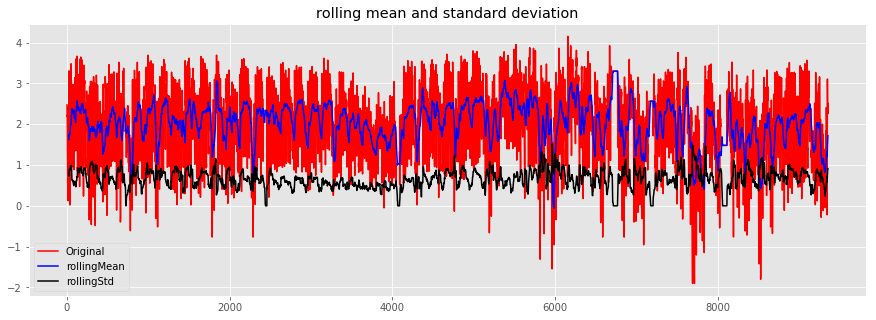

Test Statistic                -1.062401e+01
p-value                        5.423550e-19
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [453]:
from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()


    plt.figure(figsize=(15,5))
    original = plt.plot(ts,color="red",label="Original")
    rolmeanplot = plt.plot(rolling_mean,color="blue",label="rollingMean")
    rolstdplot = plt.plot(rolling_std,color="black",label="rollingStd")
    plt.title("rolling mean and standard deviation")
    plt.legend(loc="best")
    plt.show(block=False)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adfu(y)

Все как обычно). Придеться строить Arima.

In [196]:
data = df.copy()

In [197]:
indexedData = data.set_index(['DateTime'])

Берем окно шириной=24 часа. Сначала посмотрим наш baseline.

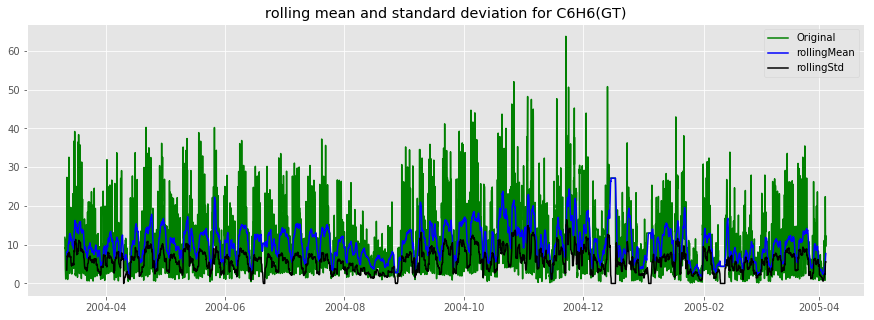

In [199]:
rolling_mean_C6H6 = indexedData['C6H6(GT)'].rolling(window = 24).mean()
rolling_std_C6H6 = indexedData['C6H6(GT)'].rolling(window = 24).std()


plt.figure(figsize=(15,5))
original_C6H6 = plt.plot(indexedData['C6H6(GT)'],color="green",label="Original")
rolmeanplot_C6H6 = plt.plot(rolling_mean_C6H6,color="blue",label="rollingMean")
rolstdplot_C6H6 = plt.plot(rolling_std_C6H6,color="black",label="rollingStd")
plt.title("rolling mean and standard deviation for C6H6(GT)")
plt.legend(loc="best")
plt.show(block=False)

Погнали логнормалить)

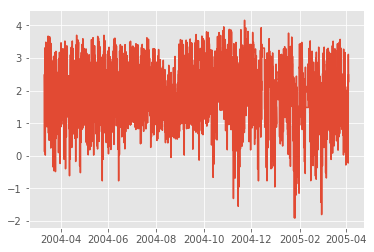

In [208]:
def getLogValues(timeseries):
  return np.log(timeseries)
indexedData_log_C6H6 = getLogValues(indexedData['C6H6(GT)'])
plt.plot(indexedData_log_C6H6)



Нам надо привести наш временной ряд к стационарному виду. А стационарность это как не странно постоянство мат/ожидания (не только оно конечно же). Вот и сделаем функцию для конверта нашего ряда в стационарный.

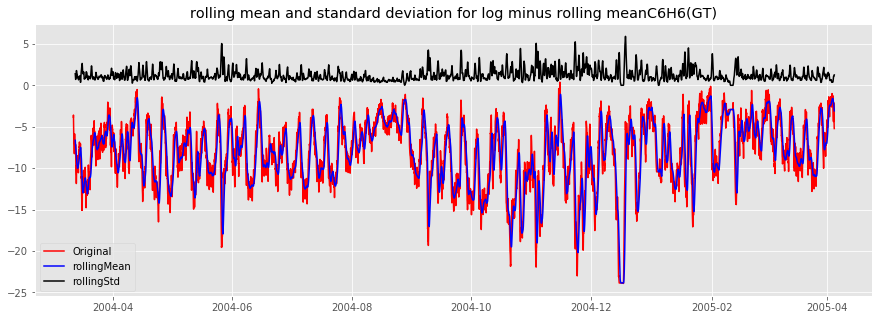

In [210]:
def plots(timeseries,name):
  rolling_mean = timeseries.rolling(window = 24).mean()
  rolling_std = timeseries.rolling(window = 24).std()


  plt.figure(figsize=(15,5))
  original = plt.plot(timeseries,color="red",label="Original")
  rolmeanplot = plt.plot(rolling_mean,color="blue",label="rollingMean")
  rolstdplot = plt.plot(rolling_std,color="black",label="rollingStd")
  plt.title("rolling mean and standard deviation for log minus rolling mean{0}".format(name))
  plt.legend(loc="best")
  plt.show(block=False)

  
def convertTostationary(timeseries,rollingmean):
  return (timeseries - rollingmean)

indexDataLogminusrollmean_C6H6 = convertTostationary(indexedData_log_C6H6,rolling_mean_C6H6)
plots(indexDataLogminusrollmean_C6H6,"C6H6(GT)")


К-красиво.Но нам нужна арима-одна на всех, мы за PACF не постоим.

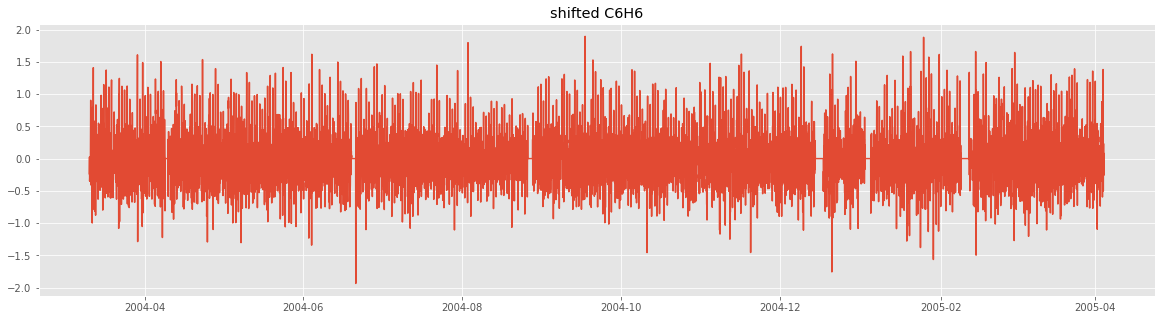

In [219]:
def shift(timeseries,name):
  plt.figure(figsize=(20,5))
  shifted =  timeseries - timeseries.shift()
  plt.title(name)
  plt.plot(shifted)
  return shifted

indexedData_C6H6_shift = shift(indexedData_log_C6H6,"shifted C6H6")

In [220]:
indexedData_C6H6_shift.dropna(how="all")

DateTime
2004-03-10 19:00:00   -0.234593
2004-03-10 20:00:00   -0.043426
2004-03-10 21:00:00    0.025347
2004-03-10 22:00:00   -0.347727
2004-03-10 23:00:00   -0.318351
2004-03-11 00:00:00   -0.268562
2004-03-11 01:00:00   -0.085715
2004-03-11 02:00:00   -0.352072
2004-03-11 03:00:00   -0.321241
2004-03-11 04:00:00   -0.271216
2004-03-11 05:00:00   -0.132195
2004-03-11 06:00:00    0.347107
2004-03-11 07:00:00    0.704334
2004-03-11 08:00:00    0.904472
2004-03-11 09:00:00    0.174399
2004-03-11 10:00:00   -0.409348
2004-03-11 11:00:00   -0.242475
2004-03-11 12:00:00    0.048169
2004-03-11 13:00:00    0.331840
2004-03-11 14:00:00    0.461986
2004-03-11 15:00:00   -0.268006
2004-03-11 16:00:00   -0.061301
2004-03-11 17:00:00    0.295156
2004-03-11 18:00:00    0.623334
2004-03-11 19:00:00    0.274160
2004-03-11 20:00:00   -0.130282
2004-03-11 21:00:00   -0.630961
2004-03-11 22:00:00   -0.998766
2004-03-11 23:00:00   -0.576122
2004-03-12 00:00:00    0.794318
                         ...   

In [221]:
indexedData_C6H6_shift.dropna(inplace=True)

Поищем сезонные составляющие на наших рядах.

In [454]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompositionTimeSeries(ts):
  decomposition = seasonal_decompose(ts)
  trend =decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid
  
  
  plt.figure(figsize=(15,5))
  plt.subplot(411)
  plt.plot(ts,label = "original")
  plt.legend(loc="best")
  
  plt.subplot(412)
  plt.plot(trend,label = "trend")
  plt.legend(loc="best")
  
  plt.subplot(413)
  plt.plot(residual,label = "residual")
  plt.legend(loc="best")
  
  plt.tight_layout()
  
  
  decomposedLogData = residual
  decomposedLogData.dropna(inplace=True)
  adfu(decomposedLogData)

Results of Dickey-Fuller Test:


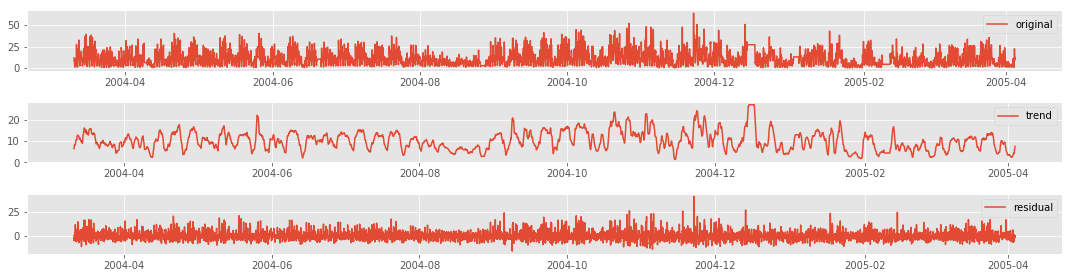

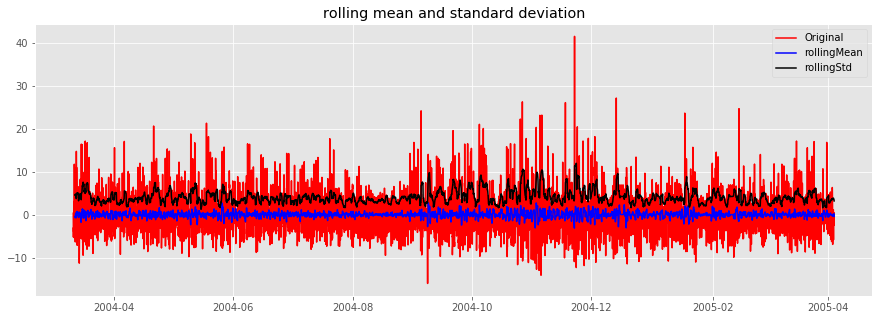

Test Statistic                  -27.764982
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    9296.000000
Critical Value (1%)              -3.431054
Critical Value (5%)              -2.861851
Critical Value (10%)             -2.566936
dtype: float64


In [455]:
decompositionTimeSeries(indexedData['C6H6(GT)'])

Как видно направление тренда меняется случайным образом в теении года ,а так же у нас нет линейных приращений или уклонов, что дает нам понять, что наш ряд стационарен, и мы можем использовать модель ARIMA.

In [225]:
from statsmodels.tsa.stattools import acf, pacf
def drawAcf(indexedData_AH):
  lag_acf = acf(indexedData_AH, nlags=20)
  lag_pacf = pacf(indexedData_AH, nlags=20, method='ols')
  #Plot ACF: 
  #plt.subplot(121) 
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  plt.show()
  #Plot PACF:
  #plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')
  plt.show()

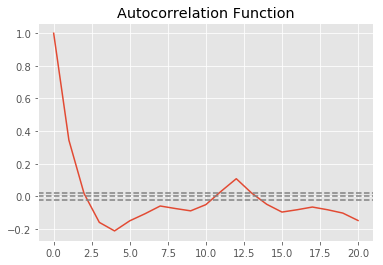

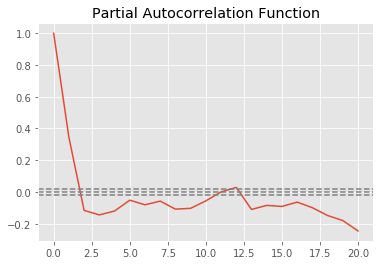

In [226]:
drawAcf(indexedData_C6H6_shift)

Печально((( Для того чтобы построить ариму нам надо получить значения p и q. 
•	p: The number of lag observations included in the model
•	q: The size of the moving average window, also called the order of moving average.
Их надо вытягивать с графиков выше, а вытянуть их не получиться потому что нет автокорреляции. Можно было бы шаманить и дальше настраивать ариму, но это вооообще отдельная тема....Поэтому остановимся на том что имеем. Какие то результаты мы все равно получили.

